In [23]:
import os, glob
from osgeo import gdal, ogr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 打开单个波段数据 DEM数据
dem_file = 'F:\python_code\gdal_gee\GDAL_LEARN\dem.tif'
ds = gdal.Open(dem_file)

In [3]:
help(ds)
# 查看对象的方法和描述

Help on Dataset in module osgeo.gdal object:

class Dataset(MajorObject)
 |  Dataset(*args, **kwargs)
 |  
 |  Proxy of C++ GDALDatasetShadow class.
 |  
 |  Method resolution order:
 |      Dataset
 |      MajorObject
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  AddBand(self, *args, **kwargs)
 |      AddBand(Dataset self, GDALDataType datatype, char ** options=None) -> CPLErr
 |  
 |  AdviseRead(self, *args)
 |      AdviseRead(Dataset self, int xoff, int yoff, int xsize, int ysize, int * buf_xsize=None, int * buf_ysize=None, GDALDataType * buf_type=None, int band_list=0, char ** options=None) -> CPLErr
 |  
 |  BeginAsyncReader(self, xoff, yoff, xsize, ysize, buf_obj=None, buf_xsize=None, buf_ysize=None, buf_type=None, band_list=None, options=None)
 |  
 |  BuildOverviews(self, *args, **kwargs)
 |      BuildOverviews(Dataset self, char const * resampling, int overviewlist=0, GDALProgressFunc callback=0, void * callback_data=None) -> int
 |  
 |  CommitTransaction(se

In [11]:
## Driver
driver = ds.GetDriver()
#help(driver)

In [20]:
#查看数据的基本信息：数据驱动、数据元信息、数据投影、仿射信息等等
driver = ds.GetDriver()
metadata = ds.GetMetadata()
prj = ds.GetProjection()
geotransform = ds.GetGeoTransform()

print('raster driver:{}'.format(driver.ShortName))
print('raster metadata:{}'.format(metadata))
print('raster projection:{}'.format(prj))
print('raster geotransform:{}'.format(geotransform))

raster driver:GTiff
raster metadata:{'AREA_OR_POINT': 'Area'}
raster projection:GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]
raster geotransform:(-140.0, 0.00833333333333, 0.0, 90.0, 0.0, -0.00833333333333)


In [21]:
#获取影像相关信息，如波段数、行列数
band_num = ds.RasterCount
rows = ds.RasterYSize
cols = ds.RasterXSize
print('number of band:{}'.format(band_num))
print('rows of image:{}'.format(rows))
print('cols of image:{}'.format(cols))
# 从前面help(ds)中看到 RasterCount\RasterYSize\RasterXSize都是对象属性描述，而不是方法，所以代码中是没有（）的，没有相关参数

number of band:1
rows of image:6000
cols of image:4800


In [22]:
#影像数据的读取，将影像读取为数组
img_array = ds.ReadAsArray()
print('content of image:{}'.format(img_array))
print('image size:{}'.format(img_array.shape)) 

content of image:[[-9999 -9999 -9999 ... -9999 -9999 -9999]
 [-9999 -9999 -9999 ... -9999 -9999 -9999]
 [-9999 -9999 -9999 ... -9999 -9999 -9999]
 ...
 [-9999 -9999 -9999 ...   701   702   702]
 [-9999 -9999 -9999 ...   701   701   695]
 [-9999 -9999 -9999 ...   698   699   691]]
image size:(6000, 4800)


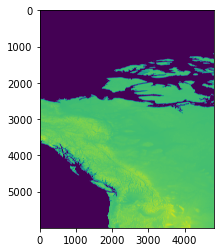

In [24]:
#具体介绍一下数据读取功能
#help(ds)中，可以看到ReadAsArray()中的参数有很多
#ReadAsArray(self, xoff=0, yoff=0, xsize=None, ysize=None, buf_obj=None, buf_xsize=None, buf_ysize=None, buf_type=None, resample_alg=0, callback=None, callback_data=None, interleave='band')
#xoff:从哪一列开始读取,默认为0
#yoff:从哪一行开始读取，默认为0
#xsize:读取几列，默认读取全部
#ysize:读取几行，默认读取全部
#buf_xsize:输出结果中的列数，默认就是输出为xsize
#buf_ysize:输出结果中的行数，默认就是输出为ysize
#resample_alg:重采样方法，默认为gdal.GRIORA_NearestNeighbour

# 先看一下完整读取的结果
plt.imshow(img_array)

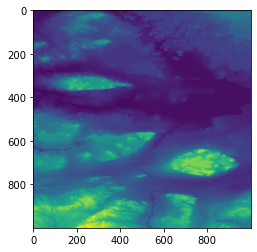

In [36]:
# 修改一下xoff，yoff
img_array1 = ds.ReadAsArray(2200, 3000, 1000, 1000)
plt.imshow(img_array1)

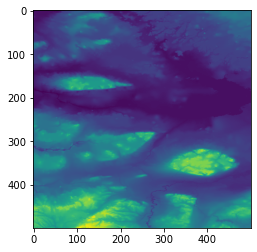

In [38]:
# 修改一下xoff，yoff, buf_xsize, buf_ysize 
img_array2 = ds.ReadAsArray(2200, 3000, 1000, 1000, buf_xsize = 500, buf_ysize = 500)
plt.imshow(img_array2)

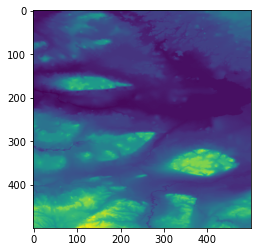

In [39]:
# 修改一下xoff，yoff, buf_xsize, buf_ysize 
img_array3 = ds.ReadAsArray(2200, 3000, 1000, 1000, buf_xsize = 500, buf_ysize = 500, resample_alg = gdal.GRA_Bilinear)
plt.imshow(img_array3)

In [40]:
img_array3 == img_array2  
# 重采样方式不一样，输出的数组数值也会发生变化

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True,  True, False],
       [False,  True, False, ..., False, False, False]])